In [10]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r'C:\vscodefolder\AML_Lab\Datasets\heart.csv')
df.head()


,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [11]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [14]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

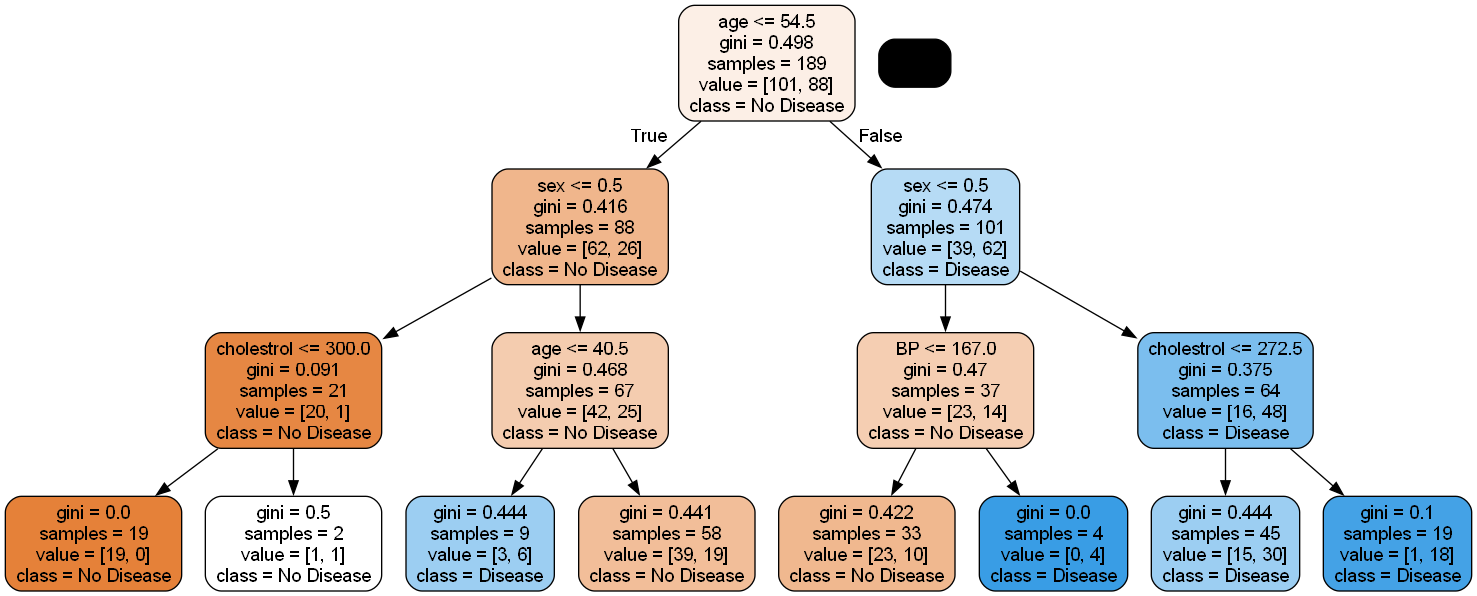

In [15]:
# plotting tree with max_depth=3
dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, filled=True, rounded=True,
feature_names=X.columns, class_names=['No Disease', "Disease"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [16]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
dt.score(X_train,y_train)

0.7407407407407407

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.7407407407407407
0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)